# Lista 002 - Pandas, Matplotlib, GeoPandas e Folium.

___
#### 1. Monte um dataframe contendo todas as informações dos arquivos csv em 'data/transito'.

In [65]:
import pandas as pd

In [66]:
df_janeiro = pd.read_csv('../data/transito/janeiro.csv', sep=';',usecols=["grav_tipo","hora_cometimento","cometimento","tipo_infrator","tipo_infracao","tipo_veiculo"])
df_fevereiro = pd.read_csv('../data/transito/fevereiro.csv', sep=';',usecols=["grav_tipo","hora_cometimento","cometimento","tipo_infrator","tipo_infracao","tipo_veiculo"])
df_marco = pd.read_csv('../data/transito/marco.csv', sep=';',usecols=["grav_tipo","hora_cometimento","cometimento","tipo_infrator","tipo_infracao","tipo_veiculo"])
df_abril = pd.read_csv('../data/transito/abril.csv', sep=';',usecols=["grav_tipo","hora_cometimento","cometimento","tipo_infrator","tipo_infracao","tipo_veiculo"])
df_maio = pd.read_csv('../data/transito/maio.csv', sep=';',usecols=["grav_tipo","hora_cometimento","cometimento","tipo_infrator","tipo_infracao","tipo_veiculo"])
df_junho = pd.read_csv('../data/transito/junho.csv', sep=';',usecols=["grav_tipo","hora_cometimento","cometimento","tipo_infrator","tipo_infracao","tipo_veiculo"])
df_julho = pd.read_csv('../data/transito/julho.csv', sep=';',usecols=["grav_tipo","hora_cometimento","cometimento","tipo_infrator","tipo_infracao","tipo_veiculo"])

In [67]:
df_transito = pd.concat([df_janeiro, df_fevereiro,df_marco,df_abril,df_maio,df_junho,df_julho], ignore_index=True)

In [69]:
df_transito.tail()

,tipo_infracao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,grav_tipo
500490,7455-0,Condutor,CAMINHAO,31/07/2020,23:57,Média
500491,7455-0,Condutor,AUTOMOVEL,31/07/2020,23:57,Média
500492,7455-0,Condutor,AUTOMOVEL,31/07/2020,23:57,Média
500493,7455-0,Condutor,MOTOCICLET,31/07/2020,23:57,Média
500494,7455-0,Condutor,CAMINHAO,31/07/2020,23:59,Média


___
#### 2. Quantos tipos diferentes de gravidade de infração exitem no dataset? Quais são?

In [ ]:
# Recuperando apenas tipos diferentes de gravidade de infração
df_transito["grav_tipo"].unique()

In [70]:
# Recuperando tipos diferentes de gravidade de infração com número de ocorrências
df_transito["grav_tipo"].value_counts()

Média         320657
Leve           88655
Grave          49004
Gravíssima     42179
Name: grav_tipo, dtype: int64

___
#### 3. Qual a hora do dia que mais se cometem infrações graves? Demonstre utilizando um gráfico de linhas.

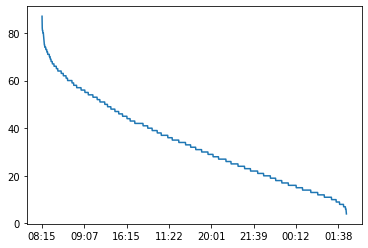

In [72]:
#Importando o pyplot
from matplotlib import pyplot as plt
df_transito[(df_transito.grav_tipo == 'Grave')].hora_cometimento.value_counts().plot(kind='line')
plt.show()

___
#### 4. Qual dia da semana que mais se cometem infrações leves? Demonstre utilizando um gráfico de linhas e colocando um texto no ponto máximo.

In [ ]:
df_transito.info()
# pd.to_datetime(df_transito.iloc[:,2])

In [ ]:
# Adicionar nova coluna a partir da coluna "cometimento" 
# df_transito['cometimento_data'] = pd.to_datetime(df_transito['cometimento'])
# df_transito['dia_da_semana'] = pd.to_datetime(df_transito['cometimento']).dt.dayofweek

In [85]:
df_transito['data'] = pd.to_datetime(df_transito['cometimento']) # Criação de nova coluna "data" utilizando to_datetime
df_transito['dia_da_semana'] = df_transito['data'].dt.dayofweek # Criação de nova coluna "dia_da_semana" utilizando dt.dayofweek

In [80]:
df_transito.query("grav_tipo == 'Leve'").dia_da_semana.value_counts()

3    16637
4    16471
0    16004
1    15123
2    14783
5     5145
6     4492
Name: dia_da_semana, dtype: int64

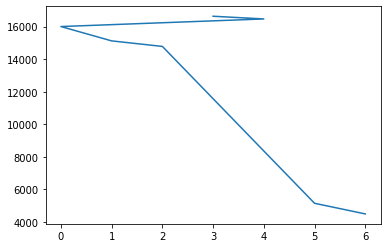

In [82]:

df_transito.query("grav_tipo == 'Leve'").dia_da_semana.value_counts().plot(kind='line')

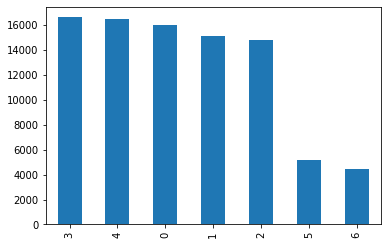

In [81]:
df_transito.query("grav_tipo == 'Leve'").dia_da_semana.value_counts().plot(kind='bar')
plt.show()

___
#### 5. Filtre o dataset pelo tipo de condutor 'condutor', qual o tipo de infração mais comum? Em que horário ele mais acontece? Monte um subplot para demonstrar as duas informações utilizando gráficos.

In [83]:
df_transito.query("tipo_infrator == 'Condutor'").tipo_infracao.value_counts()
# Para o tipo de infrator "Condutor", a infração mais comum é a 7455-0

7455-0    297088
5681-0     85074
7463-0     27752
7633-2      7878
5185-1      7178
           ...  
5428-4         1
5452-4         1
6009-5         1
6017-2         1
5606-0         1
Name: tipo_infracao, Length: 178, dtype: int64

In [84]:
df_transito.query("tipo_infrator == 'Condutor'").hora_cometimento.value_counts()
# Para o tipo de infrator "Condutor", o horário de maior ocorrência é 15:53

15:53    646
15:20    641
15:57    638
15:39    636
15:10    628
        ... 
03:29     57
03:06     56
03:31     56
04:03     56
04:04     52
Name: hora_cometimento, Length: 1440, dtype: int64

In [ ]:
df_transito.query("tipo_infrator == 'Condutor'").tipo_infracao.value_counts().plot(kind='line')
df_transito.query("tipo_infrator == 'Condutor'").hora_cometimento.value_counts().plot(kind='line')
plt.show()

___
#### 6. Monte um subplot com 7 heatmaps (1 para cada mês) demonstrando a concentração da quantidade infrações por dia do mês e hora do dia (desconsidere os minutos).

In [ ]:
df_transito['mes'] = df_transito['data'].dt.month # Criação de nova coluna "mes" utilizando dt.dayofweek
df_transito['mes'] = df_transito['data'].dt.month # Criação de nova coluna "mes" utilizando dt.dayofweek
df_transito['mes'] = df_transito['data'].dt.month # Criação de nova coluna "mes" utilizando dt.dayofweek

In [87]:
df_transito['mes'].value_counts()

7     65560
6     62631
1     61891
2     61278
3     60939
5     60340
4     43345
9     17684
12    17574
8     16866
10    16346
11    16041
Name: mes, dtype: int64

___
#### 7. Alguma bicicleta já tomou multa? Se sim, qual foi a gravidade?

In [ ]:
df_transito.query(("tipo_veiculo == 'Bicicleta'") or ("tipo_veiculo == 'BICICLETA'"))

___
#### 8.Leia as informações de cada rodovia utilizando o link abaixo e guarde em um dataframe.
'http://dados.df.gov.br/dataset/3cb44f4a-576c-45b8-8f13-ae94a6623277/resource/2bd0f48e-d3a1-47c6-bd12-83aed24e9461/download/2020-05-19-scr.csv'

In [ ]:
scr = pd.read_csv('../data/2020-05-19-scr.csv', sep=';', encoding='latin-1')

In [ ]:
scr.tail()

In [ ]:
scr.info()

___
#### 9 Investigando OS TRECHOS responda (TRUE ou FALSE).
> 9.1 Trechos em rodovias 'Distrital' possuem a mesma mediana de extensão de trechos em rodovias 'Federal'. Crie um boxplot para demonstrar e não esqueça de colocar legendas e anotação de texto.
## FALSO

In [ ]:
scr['RESPONSÁVEL'].value_counts()

In [ ]:
scr[['EXTENSÃO','RESPONSÁVEL']].median()

In [ ]:
scr.query("RESPONSÁVEL == 'DERDF     '").EXTENSÃO.median()

In [ ]:
scr.query("RESPONSÁVEL == 'DNIT      '").EXTENSÃO.median()

> 9.2 Em termos de extensão, existem mais kms de pista duplicada ('DUP') do que pista pavimentada ('PAV'). Demonstre através de um gráfico de barra.
## FALSO

In [ ]:
scr['SITUAÇÃO'].value_counts()

In [ ]:
scr.query("SITUAÇÃO == 'DUP  '").EXTENSÃO.sum()

In [ ]:
scr.query("SITUAÇÃO == 'PAV  '").EXTENSÃO.sum()

> 9.3 Existem somente duas rodovias com mais de 30 trechos.
## VERDADEIRO

In [ ]:
scr[['RODOVIA','COD. TRECHO']]

In [ ]:
scr['RODOVIA'].value_counts()

> 9.4 A distribuição das extensões dos trechos das rodovias federais segue uma distribuição normal. (Demonstre com um gráfico e um teste estatístico)

> 9.5 Existe uma diferença estatística entre as médias das extensões da rodovias vicinais e federais. (Demonstre com um teste estatístico)

> 9.6 O 2º DR tem, em média, o maior TMDA (tráfego diário médio anual) se comparado com as médias dos outros distritos. (Demonstre utilizando um gráfico).

___
#### 11. Leia as informações de Obra de Arte Especial (OAE) utilizando o link abaixo e guarde em um dataframe.
'http://dados.df.gov.br/dataset/468f0b08-f5ae-4d61-954c-3062a9d26dad/resource/fac7a26a-baa3-4250-9ae5-b9c7273ae8df/download/2020-05-19-oae.csv'

In [ ]:
oae = pd.read_csv('../data/2020-05-19-oae.csv', sep=';', encoding='latin-1')

___
#### 12. Avalie (TRUE OU FALSE):
> 12.1 A correlação entre a quantidade de OAE e a extensão total das rodovias (soma da ### extensão dos trechos) é maior do que 0.8.

In [ ]:
oae.iloc[0]

In [ ]:
oae[['COD. OAE','km']].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [ ]:
plt.scatter('COD. OAE','km',data=oae)

> 12.2 A correlação entre a largura do passeio e a altura do guarda-corpo das pontes é menor do que 0.2. - VERDADEIRO

In [ ]:
oae[['LARG. PASSEIO','ALT. GUARDA-CORPO']].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [ ]:
plt.scatter('LARG. PASSEIO','ALT. GUARDA-CORPO',data=oae)

___
### 13. Siga as instruções.

> 13.1 Crie um dataframe chamado dist_oae com as informações COD.OAE, LONGITUDE, LATITUDE de cada OAE.

In [ ]:
dist_oae = pd.read_csv('../data/2020-05-19-oae.csv', sep=';',usecols=["COD. OAE","LONGITUDE","LATITUTE"], encoding='latin-1')

In [ ]:
dist_oae.tail()

> 13.2 Trate as colunas de latitude e longitude, transformando-as de string para float. (ex: '-47.865.095.411.000' de ser transformado em -47.865095411000)

> 13.3 Transforme dist_oae em um GeoDataFrame e no parâmetro geometry passe a função do geopandas points_fromn_xy com as informações de longitude e latitude em fortmato de serie.

___
#### 14. Usando os pontos em geometry do GeoDataFrame dist_oae monte um mapa utilizando folium que contenha todas as obras de artes especiais (dica: para extrair a latitude ou longitude de um ponto basta utilizar os métodos .x ou .y). Adicione no tooltip de cada Marker o tipo da OAE.

___
#### 15. Descruba a distância entre a OAE de código 1 e todas as outras OAE (utilize o método .distance de cada point em geometry). Crie um subplot com 2 gráficos, o primeiro deverá conter um histograma de todas as distâncias e o segundo deverá ser um boxplot de todas as distâncias.

In [ ]:
infracao_mais_comum .query("infrator == 'Condutor'").tipo_infracao.value_counts()

In [ ]:
mask01 = condutor["tipo_infracao"] == '7455-0'
infracao = condutor[mask01]

In [ ]:
infracao["hora_cometimento"].value_counts()

In [ ]:
# Filtrando através de condicionais
df_transito[(df_transito["tipo_infrator"] == 'Condutor') & (df_transito["tipo_infracao"] == '7455-0') & (df_transito["hora_cometimento"] == '12:51')]

In [ ]:
# Filtrando através de uma query
df_transito.query("tipo_infrator == 'Condutor' & tipo_infracao == '7455-0' & hora_cometimento == '12:51'")

In [ ]:
df_transito

In [ ]:
df_transito[(df_transito[3] == 'bicicleta') | (df_transito[3] == 'BICICLETA')]